## Kaggle MNIST Competition


TODO:
- Introduction to the Kaggle competition
- Introduce the problem statement 
- Mention tools and libraries used and import
- Import and Visualize the dataset
- Data Cleaning and Munging
- Data Preprocessing
- Prediction

Kaggle is a popular online community platform for data scientists and machine learning enthusiasts to collaborate with other users, find and publish datasets, use notebooks, and compete with other data scientists to solve data science challenges.

#### Project Problem Statement

-Outline

- Download the dataset from Kaggle
- Visualize the dataset and gain insight
- Data Preprocessing 
- Prediction
- Submit Predicted values to Kaggle 
- Identify position on the leaderboard

...

## Mention tools and libraries used and import
- Padas

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
digits_train = r'./train.csv'

digits_csv = pd.read_csv(digits_train)

train_df = pd.DataFrame(digits_csv)

## Visualize the dataset

In [ ]:
# Display the first 3 entries in the train dataset

train_df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Cleaning

In [ ]:
train_df.isna().any()

label       False
pixel0      False
pixel1      False
pixel2      False
pixel3      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 785, dtype: bool

In [ ]:
# Dataset contains missing values that needs to be cleaning 
# Let's peek into some of the missing values

pd.set_option('display.max_columns', None)

train_df.shape




(42000, 785)

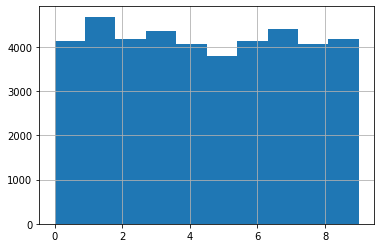

In [ ]:
train_df['label'].hist()
# From visualizing the dataset it is observed that the data is evenly distributed thought the digit 1 has more occurance
# relating to other digits.


In [ ]:
label = train_df['label']

train_X = train_df.drop(columns='label')

In [ ]:
label = np.array(label)
train_X = np.array(train_X)

In [ ]:
# Split data into train and validation set
# you don’t want one fold to be missing some digits). Moreover, some learning algorithms are sensitive to the order of the train set
# instances, and they perform poorly if they get many similar instances in a row. Shuffling the dataset ensures that this won’t happen



split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, val_index in split.split(train_X, label):
    
    split_train_x, split_val_x = train_X[train_index] , train_X[val_index]
    split_y_train, split_y_val = label[train_index] , label[val_index]
    
    
    
#print(f'Distribution of digit_cat on train set : \n {split_y_train.value_counts()/len(split_y_train)}')

#print()

#print(f'Distribution of digit_cat on test set : \n {split_y_val.value_counts()/len(split_y_val)}')


In [ ]:
split_train_x.shape

(33600, 784)

In [ ]:
split_val_x.shape

(8400, 784)

## Data Preprocessing

Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model.

In [ ]:
# Split the training data to features and label


X_train = split_train_x.copy()
y_train = split_y_train.copy()

There are 33,600 images, and each image has 784 features in the training dataset. This is because each image
is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). 
Let’s take a peek at one digit from the dataset.

Image label : 2


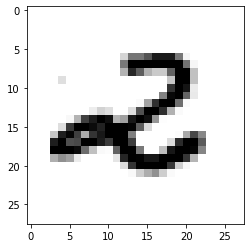

In [ ]:
some_data = X_train[0, ::]

some_data = np.array(some_data)
some_digits = some_data.reshape(28,28)

some_label = y_train[0]
some_label

print(f'Image label : {some_label}')
plt.imshow(some_digits, cmap = plt.cm.binary, interpolation="nearest")


## First Iteration

In [ ]:
std_scaler = StandardScaler()

In [ ]:
# Copy the data set and transform it using the generated pipeline
# The pixel range are from 0 to 255. Scaling this value would yield better performance to the model
pipeline = Pipeline([('std_scalar', std_scaler)])

In [ ]:
X_train_scaled = pipeline.fit_transform(X_train)

## Prediction

In [ ]:
# Hyperparameter tuning
svc_clf = SVC()

param_grid = [
    {'kernel': ['linear', 'poly'] }, {'C': [1, 5]} 
]

grid_search = GridSearchCV(svc_clf, param_grid, cv=2)

In [ ]:
np.isnan(X_train.any())

False

In [ ]:
np.all(np.isfinite(X_train_scaled))

True

In [ ]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid=[{'kernel': ['linear', 'poly']}, {'C': [1, 5]}])

In [ ]:
grid_search.best_params_

{'C': 5}

In [ ]:
## scale the validation set for best model performance
pipeline = Pipeline([('std_scalar', std_scaler)])

X_val_scaled = pipeline.fit_transform(split_val_x)

In [ ]:
# Check how well our model generalize with unseen data

y_preg = grid_search.predict(X_val_scaled)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(split_y_val, y_preg)

0.9646428571428571

In [ ]:
digits_test = r'./test.csv'

test_csv = pd.read_csv(digits_test)

test_df = pd.DataFrame(test_csv)

In [ ]:
test_df.shape

(28000, 784)

In [ ]:
## scale the validation set for best model performance
pipeline = Pipeline([('std_scalar', std_scaler)])

X_test_scaled = pipeline.fit_transform(test_df)

In [ ]:
y_test_pred = grid_search.predict(X_test_scaled)

In [ ]:
y_test_pred

array([2, 0, 9, ..., 3, 9, 2])

## Post Preprocess the prediction for the test set 

In [ ]:
sub = r'./sample_submission.csv'
sub_csv = pd.read_csv(sub)

sub_df = pd.DataFrame(sub_csv)


In [ ]:
sub_df.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
sub_df['Label'] = y_test_pred

In [ ]:
sub_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [ ]:
sub_df.set_index('ImageId')

,Label
ImageId,
1,2
2,0
3,9
4,4
5,3
...,...
27996,9
27997,7
27998,3


In [ ]:
sub_df.to_csv('submission_data2.csv')

from google.colab import files

In [ ]:
files.download('submission_data2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>